# First Data Science Project
## Melbourne Housing Prices Prediction
Here, we will go through a data challenge using data predicting housing prices in Melbourne, Australia. 

The data is from Kaggle and can be found [here](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## 1. Collection

In [3]:
full_data = pd.read_csv("./data/Melbourne_housing_FULL.csv")
full_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [4]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [5]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(full_data)
# profile.to_file(output_file="your_report.html")

### Summary of Assessment:
- drop column: address, postcode, bedrooms or rooms, longtitude, langtitude
- turn into smaller categories and then into dummies: 
type, method, sellerG
car: no parking, 1-2 parking spaces, 3-4 parking spaces, 5 and more
rooms: studio, 1 bedroom, 2 bedroom, 3-4 bedroom, 5 and more
bathroom: no bathroom, 1 bathroom, 2 bathroom, 3-4 bathroom, 5 and more
car: no parking, 1-2 parking spaces, 3-4 parking spaces, 5 and more


- check and deal with outliers and missing values: rooms, bedroom, bathroom, car, yearbuilt, landsize, buildingarea, council area, 
- turn others into other category: regionname, suburd, method, sellerG, council area

- date: Get day, time, month separately

- distance: log transform

- price: missing values to drop

### General Cleaning

In [6]:
# find the duplicated rows
full_data.loc[full_data.duplicated(), :]
# drop duplicates, keep the first
full_data.drop_duplicates(keep='first')
full_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [7]:
# drop columns I don't need
columns = ['Address', 'Postcode', 'Bedroom2', 'Longtitude', 'Lattitude', 'Date', 'Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
full_data = full_data.drop(columns = columns)
full_data.columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Propertycount'],
      dtype='object')

# Check and deal with outliers and missing values
 - rooms, bathroom, car, yearbuilt, landsize, buildingarea,


### Rooms

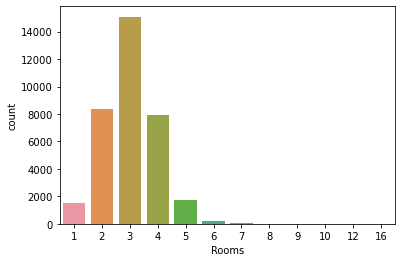

In [8]:
import seaborn as sns
sns.countplot(x='Rooms', data=full_data);

In [9]:
full_data['Rooms'].value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

No outlier which I can prove to be a typo and no missing data anymore, seems normal.

### Bathroom

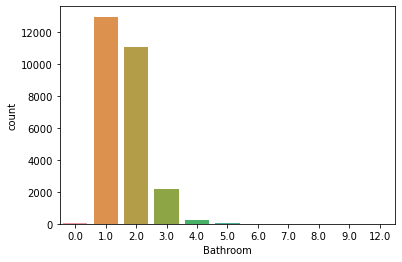

In [10]:
import seaborn as sns
sns.countplot(x='Bathroom', data=full_data);

In [11]:
full_data['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
12.0        1
9.0         1
Name: Bathroom, dtype: int64

In [12]:
full_data.loc[full_data['Bathroom'] == 9]

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
25717,10,2315000.0,10.4,9.0,2.0,612.0,466.0,2015.0,5678.0


No outlier which I can prove to be a typo and no missing data anymore, seems normal.

### Car

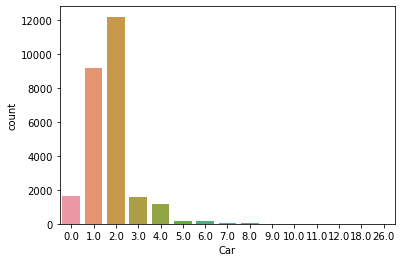

In [13]:
import seaborn as sns
sns.countplot(x='Car', data=full_data);

In [14]:
full_data['Car'].value_counts()

2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
18.0        1
12.0        1
Name: Car, dtype: int64

In [15]:
full_data.loc[full_data['Car'] == 26]

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
6017,2,NaN,5.6,2.0,26.0,267.0,500.0,2011.0,10331.0


In [17]:
mean = full_data['Car'].mean()
full_data['Car'].fillna(mean, inplace=True)

In [18]:
full_data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,NaN,2.5,1.0,1.000000,126.0,NaN,NaN,4019.0
1,2,1480000.0,2.5,1.0,1.000000,202.0,NaN,NaN,4019.0
2,2,1035000.0,2.5,1.0,0.000000,156.0,79.0,1900.0,4019.0
3,3,NaN,2.5,2.0,1.000000,0.0,NaN,NaN,4019.0
4,3,1465000.0,2.5,2.0,0.000000,134.0,150.0,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,1.0,3.000000,593.0,NaN,NaN,6543.0
34853,2,888000.0,6.3,2.0,1.000000,98.0,104.0,2018.0,6543.0
34854,2,705000.0,6.3,1.0,2.000000,220.0,120.0,2000.0,6543.0
34855,3,1140000.0,6.3,NaN,1.728845,NaN,NaN,NaN,6543.0


No outlier which I can prove to be a typo and no missing data anymore, seems normal.

### Yearbuilt

<AxesSubplot:xlabel='YearBuilt'>

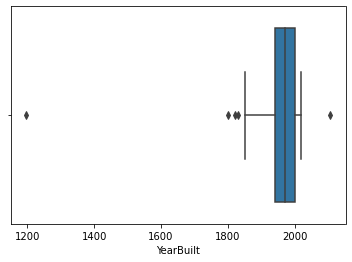

In [19]:
import seaborn as sns
sns.boxplot(x=full_data['YearBuilt'])

In [20]:
full_data.loc[(full_data['YearBuilt'] < 1800)]

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
16424,3,1200000.0,14.2,1.0,4.0,807.0,117.0,1196.0,13366.0


In [21]:
# exclude that value from the column
full_data = full_data[full_data.YearBuilt != 1196.0]
full_data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,NaN,2.5,1.0,1.000000,126.0,NaN,NaN,4019.0
1,2,1480000.0,2.5,1.0,1.000000,202.0,NaN,NaN,4019.0
2,2,1035000.0,2.5,1.0,0.000000,156.0,79.0,1900.0,4019.0
3,3,NaN,2.5,2.0,1.000000,0.0,NaN,NaN,4019.0
4,3,1465000.0,2.5,2.0,0.000000,134.0,150.0,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,1.0,3.000000,593.0,NaN,NaN,6543.0
34853,2,888000.0,6.3,2.0,1.000000,98.0,104.0,2018.0,6543.0
34854,2,705000.0,6.3,1.0,2.000000,220.0,120.0,2000.0,6543.0
34855,3,1140000.0,6.3,NaN,1.728845,NaN,NaN,NaN,6543.0


No outlier which I can prove to be a typo and no missing data anymore, seems normal.

### Landsize

<AxesSubplot:xlabel='Landsize'>

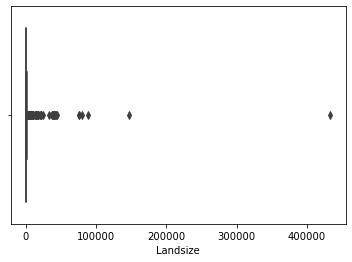

In [22]:
import seaborn as sns
sns.boxplot(x=full_data['Landsize'])

In [23]:
full_data.loc[(full_data['Landsize'] > 150000)]

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
18036,3,2700000.0,2.1,3.0,1.0,433014.0,NaN,NaN,5825.0


In [24]:
# exclude that value from the column
full_data = full_data[full_data.Landsize != 433014.0]

In [25]:
full_data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,NaN,2.5,1.0,1.000000,126.0,NaN,NaN,4019.0
1,2,1480000.0,2.5,1.0,1.000000,202.0,NaN,NaN,4019.0
2,2,1035000.0,2.5,1.0,0.000000,156.0,79.0,1900.0,4019.0
3,3,NaN,2.5,2.0,1.000000,0.0,NaN,NaN,4019.0
4,3,1465000.0,2.5,2.0,0.000000,134.0,150.0,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,1.0,3.000000,593.0,NaN,NaN,6543.0
34853,2,888000.0,6.3,2.0,1.000000,98.0,104.0,2018.0,6543.0
34854,2,705000.0,6.3,1.0,2.000000,220.0,120.0,2000.0,6543.0
34855,3,1140000.0,6.3,NaN,1.728845,NaN,NaN,NaN,6543.0


No outlier which I can prove to be a typo and no missing data anymore, seems normal.

### Building Area

<AxesSubplot:xlabel='BuildingArea'>

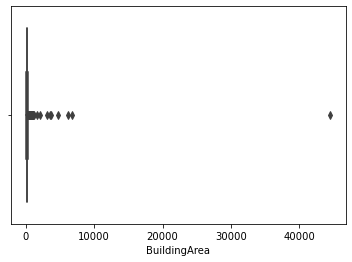

In [26]:
import seaborn as sns
sns.boxplot(x=full_data['BuildingArea'])

In [27]:
full_data.loc[:, 'BuildingArea'].value_counts().sort_values(ascending=False)

120.0    185
100.0    161
110.0    159
130.0    153
115.0    149
        ... 
416.0      1
640.0      1
584.0      1
735.0      1
649.0      1
Name: BuildingArea, Length: 740, dtype: int64

In [28]:
mean =full_data.loc[:, 'BuildingArea'].mean()
full_data.loc[:, 'BuildingArea'].fillna(mean, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [29]:
full_data  = full_data[full_data.loc[:, 'BuildingArea']!=0]

In [30]:
full_data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,NaN,2.5,1.0,1.000000,126.0,160.259548,NaN,4019.0
1,2,1480000.0,2.5,1.0,1.000000,202.0,160.259548,NaN,4019.0
2,2,1035000.0,2.5,1.0,0.000000,156.0,79.000000,1900.0,4019.0
3,3,NaN,2.5,2.0,1.000000,0.0,160.259548,NaN,4019.0
4,3,1465000.0,2.5,2.0,0.000000,134.0,150.000000,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,1.0,3.000000,593.0,160.259548,NaN,6543.0
34853,2,888000.0,6.3,2.0,1.000000,98.0,104.000000,2018.0,6543.0
34854,2,705000.0,6.3,1.0,2.000000,220.0,120.000000,2000.0,6543.0
34855,3,1140000.0,6.3,NaN,1.728845,NaN,160.259548,NaN,6543.0


### Type

In [31]:
# labels = ['house', 'townhouse', 'unit']
# g = sns.countplot(data=X_train, x='Type')
# g.set_xticklabels(labels)
# g;

### SellerG 

In [32]:
# X_train['SellerG'].value_counts().head(10)


### Regionname

In [33]:
# sns.countplot(data=X_train, y='Regionname');

### Datetime into columns

In [34]:
# X_train.loc[:,'Date'] = pd.to_datetime(X_train.loc[:,'Date'])
# X_train.loc[:,'Year'] = X_train.loc[:,'Date'].apply(lambda x: x.year)
# X_train.loc[:,'Month'] = X_train.loc[:,'Date'].apply(lambda x: x.month_name())
# X_train.loc[:,'Day'] = X_train.loc[:,'Date'].apply(lambda x: x.day)
# X_train = X_train.drop('Date', axis=1)

In [35]:
# X_train

In [36]:
### Correlations
corr_matrix = full_data.corr()
corr_matrix

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
Rooms,1.000000,0.465610,0.271546,0.611920,0.337957,0.069695,0.099083,-0.014408,-0.071784
Price,0.465610,1.000000,-0.210708,0.430003,0.177844,0.033321,0.066390,-0.339070,-0.059139
Distance,0.271546,-0.210708,1.000000,0.126096,0.211349,0.125325,0.050632,0.327839,-0.017611
Bathroom,0.611920,0.430003,0.126096,1.000000,0.305822,0.047540,0.108256,0.168209,-0.032730
Car,0.337957,0.177844,0.211349,0.305822,1.000000,0.075516,0.075081,0.130763,-0.007659
Landsize,0.069695,0.033321,0.125325,0.047540,0.075516,1.000000,0.157701,0.045408,-0.029452
BuildingArea,0.099083,0.066390,0.050632,0.108256,0.075081,0.157701,1.000000,0.066871,-0.014947
YearBuilt,-0.014408,-0.339070,0.327839,0.168209,0.130763,0.045408,0.066871,1.000000,0.024689
Propertycount,-0.071784,-0.059139,-0.017611,-0.032730,-0.007659,-0.029452,-0.014947,0.024689,1.000000


In [37]:
### Drop missing values of Price
price_nonmissing = y.dropna()
len(price_nonmissing)

NameError: name 'y' is not defined

### Turning cat into dummies

In [41]:
full_data = pd.get_dummies(full_data)

In [42]:
# columns_dummies = ['Address', 'Postcode', 'Bedroom2', 'Longtitude', 'Lattitude']
# X_train = X_train.fillna(columns = columns_dummies)
# X_train.columns

In [43]:
full_data['Car']=full_data['Car'].fillna(full_data['Car'].mode()[0])
full_data['Bathroom']=full_data['Bathroom'].fillna(full_data['Bathroom'].mode()[0])
full_data['Rooms']=full_data['Rooms'].fillna(full_data['Rooms'].mode()[0])
full_data['Landsize']=full_data['Landsize'].fillna(full_data['Landsize'].mode()[0])
full_data['BuildingArea']=full_data['BuildingArea'].fillna(full_data['BuildingArea'].mode()[0])
full_data['YearBuilt']=full_data['YearBuilt'].fillna(full_data['YearBuilt'].mode()[0])
full_data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,NaN,2.5,1.0,1.000000,126.0,160.259548,1970.0,4019.0
1,2,1480000.0,2.5,1.0,1.000000,202.0,160.259548,1970.0,4019.0
2,2,1035000.0,2.5,1.0,0.000000,156.0,79.000000,1900.0,4019.0
3,3,NaN,2.5,2.0,1.000000,0.0,160.259548,1970.0,4019.0
4,3,1465000.0,2.5,2.0,0.000000,134.0,150.000000,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,1.0,3.000000,593.0,160.259548,1970.0,6543.0
34853,2,888000.0,6.3,2.0,1.000000,98.0,104.000000,2018.0,6543.0
34854,2,705000.0,6.3,1.0,2.000000,220.0,120.000000,2000.0,6543.0
34855,3,1140000.0,6.3,1.0,1.728845,0.0,160.259548,1970.0,6543.0


In [44]:
# # change date to datetime
# full_data['Date'] = pd.to_datetime(full_data['Date'])
# full_data.dtypes

In [45]:
# dummies_full_data = dummies_full_data.replace([np.inf, -np.inf], np.nan)

In [46]:
# np.all(np.isfinite(dummies_full_data))

In [47]:
# y

In [48]:
full_data = full_data.dropna(subset=['Distance', 'Propertycount'])
full_data.isna().sum()

Rooms               0
Price            7595
Distance            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
Propertycount       0
dtype: int64

In [49]:
y = full_data.loc[:, "Price"]

In [50]:
y = y.dropna(axis=0, how='any')

In [51]:
y.isna().sum()

0

In [52]:
X

NameError: name 'X' is not defined

In [53]:
X = full_data.copy()
X = X.dropna(subset=['Price'])

In [54]:
X.shape

(27181, 9)

In [55]:
X = X.drop(columns=['Price'])

In [56]:
X.shape

(27181, 8)

In [57]:
y.shape

(27181,)

In [58]:
X

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,2.5,1.0,1.000000,202.0,160.259548,1970.0,4019.0
2,2,2.5,1.0,0.000000,156.0,79.000000,1900.0,4019.0
4,3,2.5,2.0,0.000000,134.0,150.000000,1900.0,4019.0
5,3,2.5,2.0,1.000000,94.0,160.259548,1970.0,4019.0
6,4,2.5,1.0,2.000000,120.0,142.000000,2014.0,4019.0
...,...,...,...,...,...,...,...,...
34852,4,6.3,1.0,3.000000,593.0,160.259548,1970.0,6543.0
34853,2,6.3,2.0,1.000000,98.0,104.000000,2018.0,6543.0
34854,2,6.3,1.0,2.000000,220.0,120.000000,2000.0,6543.0
34855,3,6.3,1.0,1.728845,0.0,160.259548,1970.0,6543.0


In [59]:
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, random_state=42)

In [60]:
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X,y)

LinearRegression()

In [61]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

In [62]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 335421.228382769
MSE: 256755344278.7119
RMSE: 506710.31593871454


In [63]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.4026443949017776


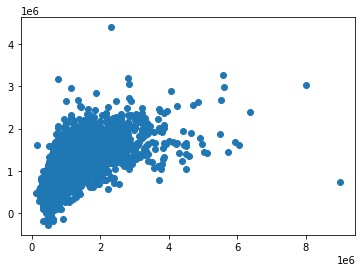

In [64]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

In [65]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,280312.735347
Distance,-31279.776564
Bathroom,207349.075737
Car,47581.896093
Landsize,8.356642
BuildingArea,52.913837
YearBuilt,-5171.135352
Propertycount,-2.691799


In [ ]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

## 4. Model Building

## 5. Iterating